https://github.com/davidbau/how-to-read-pytorch

In [1]:
import math
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0,5,101)
print(x[:5])

tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000])


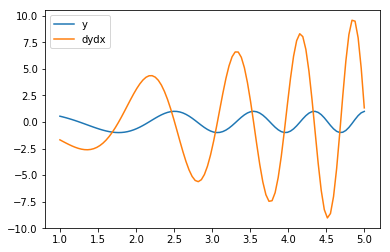

In [6]:
x = torch.linspace(1,5,100,requires_grad = True)
y = (x**2).cos()
dydx = torch.autograd.grad(y.sum(),[x])[0]
plt.plot(x.detach(),y.detach(),label='y')
plt.plot(x.detach(),dydx,label='dydx')
plt.legend()
plt.show()

In [2]:
x = torch.randn(3,4,requires_grad=True)
for i in range(3):
    for j in range(4):
        x[i][j] = i + j
y = x**2
print(x)
print(y)

tensor([[0., 1., 2., 3.],
        [1., 2., 3., 4.],
        [2., 3., 4., 5.]], grad_fn=<CopySlices>)
tensor([[ 0.,  1.,  4.,  9.],
        [ 1.,  4.,  9., 16.],
        [ 4.,  9., 16., 25.]], grad_fn=<PowBackward0>)


In [4]:
weight = torch.ones(y.size())

In [5]:
dydx = torch.autograd.grad(y,x,grad_outputs=weight)

In [6]:
dydx

(tensor([[ 0.,  2.,  4.,  6.],
         [ 2.,  4.,  6.,  8.],
         [ 4.,  6.,  8., 10.]]),)

In [ ]:
x_init = torch.randn(2)
x = x_init.clone()
x.requires_grad = True
optimizer = torch.optim.SGD([X],lr=0.1,momentum=0.5)
bowl = torch.tensor([[ 0.4410, -1.0317], [-0.2844, -0.1035]])
track,losses = [],[]
for iter in range(21):
    objective = torch.mm(bowl,x[:,None]).norm()
    optimizer.zero_grad()
    objective.backward()
    optimizer.step()